In [1]:
#imports
import numpy as np
import pandas as pd
import terality as te

import matplotlib.pyplot as plt

import datetime

path = "/Users/conorosully/Google Drive/My Drive/Medium/Terality/"

You are using version 0.14.3 of the Terality client, but version 0.14.11 is available. Consider upgrading your version to get the latest fixes and features.


# Pandas intro

In [ ]:
#Gives an error
s3_folder = "s3://terality-tutorial/transactions.csv"
df = pd.read_csv(s3_folder)

In [17]:
#Using a sample
s3_folder = "s3://terality-tutorial/transactions.csv"
df = pd.read_csv(s3_folder,nrows=5000000)
df.groupby(['YEAR'],as_index=False)['AMOUNT'].sum()

,YEAR,AMOUNT
0,2010,3335804.19
1,2011,9469178.74
2,2012,14256696.86
3,2013,19545611.31
4,2014,25468170.43
5,2015,31388327.76
6,2016,37108109.62
7,2017,41759191.64
8,2018,45594729.30
9,2019,50719981.09


# Terality

In [22]:
#Import data
begin = datetime.datetime.now()

s3_folder = "s3://terality-tutorial/transactions.csv"
df = te.read_csv(s3_folder)

print(datetime.datetime.now() - begin)
df.head()

0:00:27.465444


,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
0,CI6XLYUMQK,2015-05-01,None,T8I9ZB5A6X90UG8,2015-09-11,2015,9,11,Motor/Travel,20.27
1,CI6XLYUMQK,2015-05-01,None,TZ4JSLS7SC7FO9H,2017-02-08,2017,2,8,Motor/Travel,12.85
2,CI6XLYUMQK,2015-05-01,None,TTUKRDDJ6B6F42H,2015-08-01,2015,8,1,Housing,383.80
3,CI6XLYUMQK,2015-05-01,None,TDUHFRUKGPPI6HD,2019-03-16,2019,3,16,Entertainment,5.72
4,CI6XLYUMQK,2015-05-01,None,T0JBZHBMSVRFMMD,2015-05-15,2015,5,15,Entertainment,11.06


### Total expenditure each year

In [23]:
begin = datetime.datetime.now()
    
agg_1 = df.groupby(['YEAR'],as_index=False)['AMOUNT'].sum()

print(datetime.datetime.now() - begin)

agg_1

0:00:18.523850


,YEAR,AMOUNT
0,2010,2.041377e+08
1,2011,5.842620e+08
2,2012,9.596104e+08
3,2013,1.324468e+09
4,2014,1.699034e+09
5,2015,2.058469e+09
6,2016,2.399227e+09
7,2017,2.709008e+09
8,2018,2.997901e+09
9,2019,3.267153e+09


INFO:terality:The result of te.series.shape was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/terality/_terality/terality_structures/structure.py:285: TeralityWarning: 'Iterating data structures is inefficient, see https://docs.terality.com/getting-terality/user-guide/best-practices-and-anti-patterns for more information.'
  warnings.warn(TeralityWarning(ITERATION_WARNING))
INFO:terality:The result of te.series.shape was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/terality/_terality/terality_structures/structure.py:285: TeralityWarning: 'Iterating data structures is inefficient, see https://docs.terality.com/getting-terality/user-guide/best-practices-and-anti-patterns for more information.'
  warnings.warn(TeralityWarning(ITERATION_WARNING))


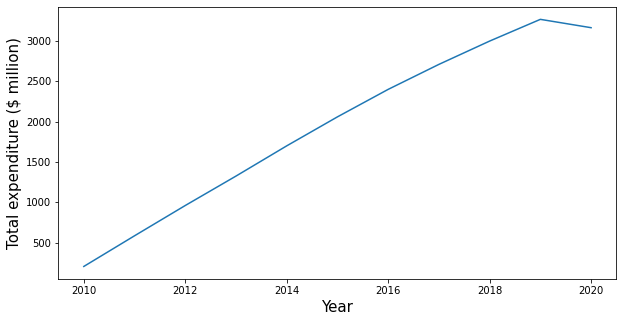

In [24]:
#Plot aggregation
plt.figure(figsize=(10, 5))
plt.plot(agg_1['YEAR'],agg_1['AMOUNT']/1000000)
plt.ylabel('Total expenditure ($ million)',size=15)
plt.xlabel('Year',size=15)

plt.savefig(path+"agg_1.png",dpi=100)

### Average monthly entertainment expenditure in 2020 

In [25]:
begin = datetime.datetime.now()
    
trans_2020 = df[(df.YEAR==2020) & (df.EXP_TYPE=='Entertainment')]
cust_agg = trans_2020.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
agg_2 = cust_agg.groupby(['MONTH'],as_index=False)['AMOUNT'].mean()

print(datetime.datetime.now() - begin)

agg_2       

0:00:44.957605


,MONTH,AMOUNT
0,1,1043.401515
1,2,1045.010168
2,3,1045.998506
3,4,1047.275421
4,5,1049.368476
5,6,1051.868845
6,7,1052.693488
7,8,1054.660818
8,9,1057.858780
9,10,1165.543588


INFO:terality:The result of te.series.shape was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/terality/_terality/terality_structures/structure.py:285: TeralityWarning: 'Iterating data structures is inefficient, see https://docs.terality.com/getting-terality/user-guide/best-practices-and-anti-patterns for more information.'
  warnings.warn(TeralityWarning(ITERATION_WARNING))
INFO:terality:The result of te.series.shape was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/terality/_terality/terality_structures/structure.py:285: TeralityWarning: 'Iterating data structures is inefficient, see https://docs.terality.com/getting-terality/user-guide/best-practices-and-anti-patterns for more information.'
  warnings.warn(TeralityWarning(ITERATION_WARNING))


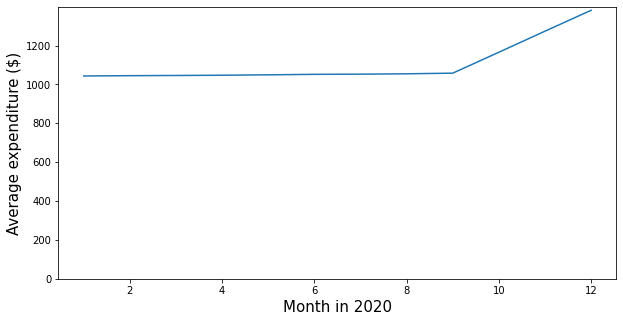

In [26]:
#Plot aggregation
plt.figure(figsize=(10, 5))
plt.plot(agg_2['MONTH'],agg_2['AMOUNT'])
plt.ylabel('Average expenditure ($)',size=15)
plt.xlabel('Month in 2020',size=15)
plt.ylim(bottom=0)

plt.savefig(path+"agg_2.png",dpi=100)

### % of customers who saved in March 2019

In [27]:
begin = datetime.datetime.now()

trans_MAR19 = df[(df.YEAR==2019) & (df.MONTH==3)]
total = len(trans_MAR19.groupby('CUST_ID'))
saved = len(trans_MAR19[trans_MAR19.EXP_TYPE =='Savings'].groupby('CUST_ID'))

agg_3 = saved/total
print(agg_3)

print(datetime.datetime.now() - begin)

agg_3  

INFO:terality:The result of te.dataframe.df_col_by_attribute_access was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].


0:00:46.327649


0.2967565774363947

### Average monthly savings in last 12 months for June 2018

In [28]:
begin = datetime.datetime.now()

#Get total saving each month 
trans_12M = df[(df.DATE >='2017-07-01') & (df.DATE <='2018-06-30')]
trans_save = trans_12M[trans_12M.EXP_TYPE =='Savings']
total_save = trans_save.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['AMOUNT'].sum()

#Change monthly savings to a value of 0 when there are no saving transactions
cust_base = trans_12M.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['TRANS_ID'].count()
adjust_save = cust_base.join(total_save.set_index(['CUST_ID','YEAR','MONTH']),on=['CUST_ID','YEAR','MONTH'])
adjust_save.fillna(0,inplace=True)

#Calculate average monthly savings
agg_4 = adjust_save.groupby(['CUST_ID'],as_index=False)['AMOUNT'].mean()
agg_4.columns=['CUST_ID','FEATURE_1']

print(datetime.datetime.now() - begin)

agg_4

       

INFO:terality:The result of te.dataframe.df_col_by_attribute_access was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].


0:01:16.776161


,CUST_ID,FEATURE_1
0,C000BK8N2S,0.000000
1,C000TDGP4R,621.659167
2,C001F6USSU,0.000000
3,C0026REM1Q,0.000000
4,C003MG8NQZ,0.000000
...,...,...
44252,CZZS42AMEK,728.201667
44253,CZZU6XWAUZ,296.750000
44254,CZZUM94ZSD,0.000000
44255,CZZXQ5ULG7,60.259167


### Total gambling as a % of total expenditure in last 3 months

In [29]:
begin = datetime.datetime.now()

#Get total saving each month 
trans_3M = df[(df.DATE >='2018-04-01') & (df.DATE <='2018-06-30')]
total_exp = trans_3M.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()
total_exp.columns = ['CUST_ID','TOTAL']

#Total gambling each month 
trans_gamble = trans_3M[trans_3M.EXP_TYPE == 'Gambling']
total_gamble = trans_gamble.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()
total_gamble.columns = ['CUST_ID','GAMBLE']

#Join and calculate feature
agg_5 = total_exp.join(total_gamble.set_index(['CUST_ID']),on=['CUST_ID'])
agg_5.fillna(0,inplace=True)
agg_5['FEATURE_2'] = agg_5['GAMBLE']/agg_5['TOTAL']

print(datetime.datetime.now() - begin)

agg_5

INFO:terality:The result of te.dataframe.df_col_by_attribute_access was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
INFO:terality:The result of te.dataframe.df_col_by_attribute_access was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].
INFO:terality:The result of te.series.__le__ was retrieved from cache [docs: https://docs.terality.com/getting-terality/user-guide/caching].


0:00:48.856077


,CUST_ID,TOTAL,GAMBLE,FEATURE_2
0,C000BK8N2S,7359.42,1863.15,0.253165
1,C000TDGP4R,40098.46,0.00,0.000000
2,C0026REM1Q,1545.85,0.00,0.000000
3,C003MG8NQZ,21161.43,0.00,0.000000
4,C00413PSKU,42257.38,0.00,0.000000
...,...,...,...,...
39808,CZZRTIXU97,13698.61,0.00,0.000000
39809,CZZS42AMEK,37192.72,3459.91,0.093027
39810,CZZUM94ZSD,2951.41,0.00,0.000000
39811,CZZXQ5ULG7,7776.73,0.00,0.000000


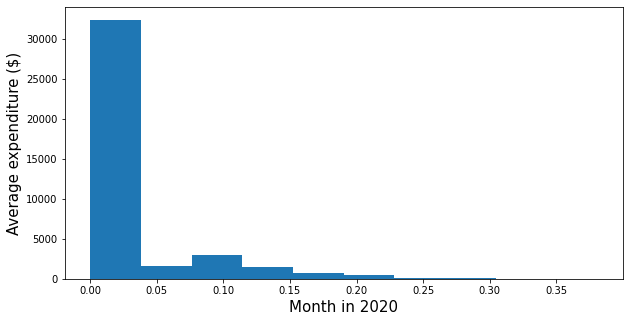

In [30]:
plt.figure(figsize=(10, 5))
x = np.array(agg_5['FEATURE_2'])
plt.hist(x)
plt.ylabel('Number of Customers',size=15)
plt.xlabel('Feature Value',size=15)

plt.savefig(path+"agg_5.png",dpi=100)

# Batch processing with pandas 
# =========================

In [2]:
def get_rows(steps,count,names,path='../Data/transactions.csv'):
    
    """
    Returns a subset of rows from a CSV. The fist [steps]*[count] 
    rows are skipped and the next [steps] rows are returned. 
    
    params
    ------------
        steps: number of rows returned
        count: count variable updated each iteration 
        names: columns names of dataset
        path: location of csv
    """
    
    if count ==0:
        df = pd.read_csv(path,
                         nrows=steps)
    else: 
        df = pd.read_csv(path,
                         skiprows=steps*count,
                         nrows=steps,
                         names=names)
    return df

### Total expenditure each year

In [3]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Initialise yearly totals
total_exp = pd.Series([0.0]*11, index=range(2010,2021))

count = 0
while True:
    
    df = get_rows(steps,count,names)

    #Get yearly totals for subsection
    exp = df.groupby(['YEAR'])['AMOUNT'].sum()
    
    #Loop over years 2010 to 2020
    for year in range(2010,2021):
        #Update yearly totals
        total_exp[year] += exp[year]
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break
print()
print(total_exp)  

print(datetime.datetime.now() - begin)

#Plot aggregation
plt.figure(figsize=(10, 5))

plt.plot(total_exp.index,total_exp/1000000000)
plt.ylabel('Total expenditure ($ billion)',size=15)
plt.xlabel('Year',size=15)
plt.ylim(bottom=0)

1 

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

### Average monthly entertainment expenditure in 2020

In [ ]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

#Create empty total expenditure dataframe
total_exp = pd.DataFrame(columns=['CUST_ID','MONTH','AMOUNT'])

count = 0
while True:
    
    df = get_rows(steps,count,names)

    #Calculate monthly totals for each customer
    df_2020 = df[(df.YEAR==2020) & (df.EXP_TYPE=='Entertainment')]
    sum_exp = df_2020.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    #Append monthly totals
    total_exp = total_exp.append(sum_exp)
    
    #Aggregate again so CUST_ID and MONTH are unique
    total_exp = total_exp.groupby(['CUST_ID','MONTH'],as_index=False)['AMOUNT'].sum()
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break

#Final aggregations
avg_exp = total_exp.groupby(['MONTH'])['AMOUNT'].mean()

print()
print(datetime.datetime.now() - begin)

#Plot aggregation
plt.figure(figsize=(10, 5))
plt.plot(avg_exp.index,avg_exp)
plt.ylabel('Average entertainment expenditure',size=12)
plt.xlabel('Month',size=15)
plt.ylim(bottom=0)

### % of customers who saved in March 2019

In [4]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

total=set()
saved=set()

count = 0
while True:
    
    df = get_rows(steps,count,names)
    
    #get transactions in 2020
    trans_MAR19 = df[(df.YEAR==2019) & (df.MONTH==3)]

    for c in trans_MAR19['CUST_ID']: 
        total.add(c)

    for c in trans_MAR19[trans_MAR19.EXP_TYPE =='Savings']['CUST_ID']:
        saved.add(c)

    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break

agg_3 = len(saved)/len(total)
print()
print(datetime.datetime.now() - begin)

print(agg_3)

1 

/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  del sys.path[0]


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
0:45:11.105703
0.2967565774363947


### Average monthly savings in last 12 months for June 2018

In [5]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

total_save = pd.DataFrame(columns=['CUST_ID','YEAR','MONTH','AMOUNT'])
cust_base = pd.DataFrame(columns=['CUST_ID','YEAR','MONTH','TRANS_ID'])

count = 0
while True:
    
    df = get_rows(steps,count,names)
    
    #Get total saving each month 
    trans_12M = df[(df.DATE >='2017-07-01') & (df.DATE <='2018-06-30')]

    #Savings
    save = trans_12M[trans_12M.EXP_TYPE =='Savings']
    save = save.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['AMOUNT'].sum()
    total_save = total_save.append(save)
    total_save = total_save.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['AMOUNT'].sum()

    #Cust base
    cust = trans_12M.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['TRANS_ID'].count()
    cust_base = cust_base.append(cust)
    cust_base = cust_base.groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['TRANS_ID'].count()
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break

adjust_save = cust_base.join(total_save.set_index(['CUST_ID','YEAR','MONTH']),on=['CUST_ID','YEAR','MONTH'])
adjust_save.fillna(0,inplace=True)
agg_4 = adjust_save.groupby(['CUST_ID'],as_index=False)['AMOUNT'].mean()
agg_4.columns=['CUST_ID','FEATURE_1']
print()
print(datetime.datetime.now() - begin)

agg_4

1 

/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  del sys.path[0]


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
0:46:47.881837


,CUST_ID,FEATURE_1
0,C000BK8N2S,0.000000
1,C000TDGP4R,621.659167
2,C001F6USSU,0.000000
3,C0026REM1Q,0.000000
4,C003MG8NQZ,0.000000
...,...,...
44252,CZZS42AMEK,728.201667
44253,CZZU6XWAUZ,296.750000
44254,CZZUM94ZSD,0.000000
44255,CZZXQ5ULG7,60.259167


### Total gambling as a % of total expenditure in last 3 months


1 

/Users/conorosully/miniconda3/envs/Python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  del sys.path[0]


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
0:46:58.021983


Text(0.5, 0, 'Month in 2020')

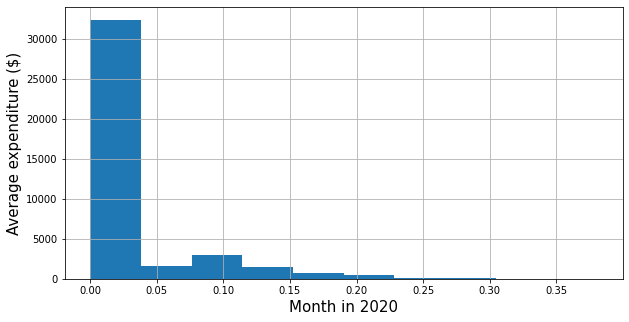

In [6]:
begin = datetime.datetime.now()

steps = 5000000
names = ['CUST_ID', 'START_DATE', 'END_DATE', 'TRANS_ID', 'DATE', 'YEAR',
       'MONTH', 'DAY', 'EXP_TYPE', 'AMOUNT']

total_exp = pd.DataFrame(columns=['CUST_ID','AMOUNT'])
total_gamble = pd.DataFrame(columns=['CUST_ID','AMOUNT'])

count = 0
while True:
    
    df = get_rows(steps,count,names)
    
    #Get total saving each month 
    trans_3M = df[(df.DATE >='2018-04-01') & (df.DATE <='2018-06-30')]

    #Total
    exp = trans_3M.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()
    total_exp = total_exp.append(exp)
    total_exp = total_exp.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()

    #Gambling
    trans_gamble = trans_3M[trans_3M.EXP_TYPE == 'Gambling']
    gamble = trans_gamble.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()
    total_gamble = total_gamble.append(gamble)
    total_gamble = total_gamble.groupby(['CUST_ID'],as_index=False)['AMOUNT'].sum()
    
    count+=1
    print(count,end=" ")
    #Exit loop
    if len(df)!=steps:
        break

total_exp.columns = ['CUST_ID','TOTAL']
total_gamble.columns = ['CUST_ID','GAMBLE']
agg_5 = total_exp.join(total_gamble.set_index(['CUST_ID']),on=['CUST_ID'])
agg_5.fillna(0,inplace=True)
agg_5['FEATURE_2'] = agg_5['GAMBLE']/agg_5['TOTAL']


print()
print(datetime.datetime.now() - begin)

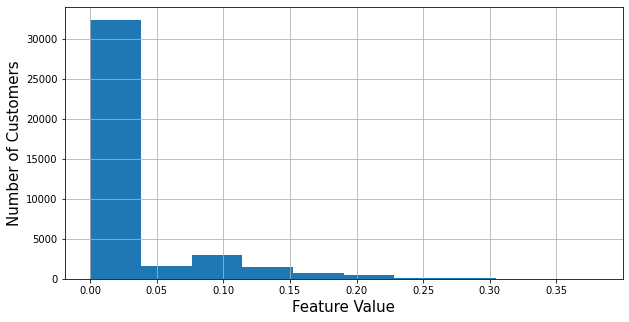

In [7]:
plt.figure(figsize=(10, 5))
agg_5['FEATURE_2'].hist()
plt.ylabel('Number of Customers',size=15)
plt.xlabel('Feature Value',size=15)

plt.savefig(path+"agg_5.png",dpi=100)

# Compare 

In [2]:
#Recorded times

terality = ['0:00:27.465444',
'0:00:18.523850',
'0:00:44.957605',
'0:00:46.327649', 
'0:01:16.776161', 
'0:00:48.856077']

pandas = ['0:00:0',
          '0:48:47.387897',
         '0:51:05.659148',
         '0:45:11.105703',
         '0:46:47.881837',
         '0:46:58.021983']

In [4]:
#Convert time to minutes
labels = ['1','2','3','4']
terality = [18/60,44/60,46/60,48/60]
pandas = [48+47/60,51+5/60,45+11/60,46+58/60]

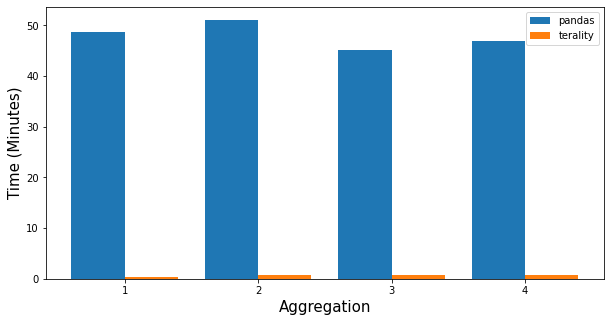

In [5]:
#Plot time
plt.figure(figsize=(10, 5))

x = np.arange(len(labels)) 
width = 0.4
plt.bar(x-width/2,height= pandas,width=width,label='pandas')
plt.bar(x+width/2,height= terality,width=width,label='terality')
plt.legend()

plt.ylabel('Time (Minutes)',size=15)
plt.xlabel('Aggregation',size=15)
plt.xticks(ticks=x,labels=labels)

plt.savefig(path+"Comparison.png",dpi=100)